# Chicago - Hour Range

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Reading merged bike datas for 2018
chicago_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/chicago_merged_2018.csv")
# dc_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/dc_merged_2018.csv")
# nyc_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/nyc_merged_2018.csv")

In [5]:
chicago_2018.head()

,start_date,start_hour_range,start_station_name,trip_count,trip_duration_avg,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,01/01/2018,1am-6am,Broadway & Belmont Ave,1,448,-2,1,-9,0.0,10.74,1.2
1,01/01/2018,1am-6am,Broadway & Cornelia Ave,1,261,-2,1,-9,0.0,10.74,1.2
2,01/01/2018,1am-6am,California Ave & North Ave,1,498,-2,1,-9,0.0,10.74,1.2
3,01/01/2018,1am-6am,Clarendon Ave & Gordon Ter,1,310,-2,1,-9,0.0,10.74,1.2
4,01/01/2018,1am-6am,Clark St & Grace St,1,320,-2,1,-9,0.0,10.74,1.2


In [6]:
chicago_2018_gb = chicago_2018.groupby(["start_date", "start_hour_range"])
chicago_2018_agg =chicago_2018_gb.agg({"trip_count": "sum", "TAVG": "mean", "TMAX": "mean",
                                       "TMIN": "mean", "PRCP": "mean", "AWND": "mean", "SNWD": "mean"}) 
chicago_2018_agg.reset_index(level=["start_date", "start_hour_range"], inplace=True)
chicago_2018_agg.head()

,start_date,start_hour_range,trip_count,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,01/01/2018,10am-4pm,209,-2,1,-9,0.0,10.74,1.2
1,01/01/2018,1am-6am,37,-2,1,-9,0.0,10.74,1.2
2,01/01/2018,5pm-7pm,53,-2,1,-9,0.0,10.74,1.2
3,01/01/2018,7am-9am,22,-2,1,-9,0.0,10.74,1.2
4,01/01/2018,8pm_12am,55,-2,1,-9,0.0,10.74,1.2


In [7]:
chicago_2018_m = chicago_2018_agg.drop(["start_date", "trip_count"], axis=1)
chicago_2018_m.head()

,start_hour_range,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,10am-4pm,-2,1,-9,0.0,10.74,1.2
1,1am-6am,-2,1,-9,0.0,10.74,1.2
2,5pm-7pm,-2,1,-9,0.0,10.74,1.2
3,7am-9am,-2,1,-9,0.0,10.74,1.2
4,8pm_12am,-2,1,-9,0.0,10.74,1.2


In [8]:
chicago_2018_X = pd.get_dummies(chicago_2018_m)
chicago_2018_X.columns

Index(['TAVG', 'TMAX', 'TMIN', 'PRCP', 'AWND', 'SNWD',
       'start_hour_range_10am-4pm', 'start_hour_range_1am-6am',
       'start_hour_range_5pm-7pm', 'start_hour_range_7am-9am',
       'start_hour_range_8pm_12am'],
      dtype='object')

In [9]:
chicago_2018_X.head()

,TAVG,TMAX,TMIN,PRCP,AWND,SNWD,start_hour_range_10am-4pm,start_hour_range_1am-6am,start_hour_range_5pm-7pm,start_hour_range_7am-9am,start_hour_range_8pm_12am
0,-2,1,-9,0.0,10.74,1.2,1,0,0,0,0
1,-2,1,-9,0.0,10.74,1.2,0,1,0,0,0
2,-2,1,-9,0.0,10.74,1.2,0,0,1,0,0
3,-2,1,-9,0.0,10.74,1.2,0,0,0,1,0
4,-2,1,-9,0.0,10.74,1.2,0,0,0,0,1


In [10]:
chicago_2018_Y = chicago_2018_agg["trip_count"].values.reshape(-1, 1)

In [11]:
print(chicago_2018_X.shape, chicago_2018_Y.shape)

(1825, 11) (1825, 1)


In [12]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(chicago_2018_X, chicago_2018_Y, random_state=42)


In [13]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler_chicago = StandardScaler().fit(X_train_ch)
y_scaler_chicago = StandardScaler().fit(y_train_ch)

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled_ch =  X_scaler_chicago.transform(X_train_ch)
X_test_scaled_ch = X_scaler_chicago.transform(X_test_ch)
y_train_scaled_ch = y_scaler_chicago.transform(y_train_ch)
y_test_scaled_ch = y_scaler_chicago.transform(y_test_ch)

In [15]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression

model_ch = LinearRegression()
model_ch.fit(X_train_scaled_ch, y_train_scaled_ch)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

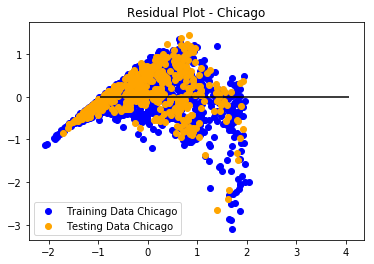

In [16]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions_ch = model_ch.predict(X_test_scaled_ch)
model_ch.fit(X_train_scaled_ch, y_train_scaled_ch)

plt.scatter(model_ch.predict(X_train_scaled_ch), model_ch.predict(X_train_scaled_ch) - y_train_scaled_ch, c="blue", label="Training Data Chicago")
plt.scatter(model_ch.predict(X_test_scaled_ch), model_ch.predict(X_test_scaled_ch) - y_test_scaled_ch, c="orange", label="Testing Data Chicago")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled_ch.min(), xmax=y_test_scaled_ch.max())
plt.title("Residual Plot - Chicago")

plt.savefig("residual_chicago_hr.png", bbox_inches="tight")

In [17]:
print('Weight coefficients: ', model_ch.coef_)
print('y-axis intercept: ', model_ch.intercept_) 

Weight coefficients:  [[ 0.38256052  0.17525073 -0.02658305 -0.11326832 -0.0796775   0.01038011
   0.42171597 -0.30338161  0.10239724 -0.01253836 -0.20862039]]
y-axis intercept:  [1.40273475e-17]


In [24]:
i=22
print(f"True output: {y_test_scaled_ch[i]}")
print(f"Predicted output: {predictions_ch[i]}")
print(f"Prediction Error: {predictions_ch[i] - y_test_scaled_ch[i]}")
print(f"Prediction Error %: {(predictions_ch[i] - y_test_scaled_ch[i]) / y_test_scaled_ch[i] * 100}")

True output: [1.51168943]
Predicted output: [1.40722001]
Prediction Error: [-0.10446942]
Prediction Error %: [-6.91077238]


In [26]:
i=54
print(f"True output: {y_test_scaled_ch[i]}")
print(f"Predicted output: {predictions_ch[i]}")
print(f"Prediction Error: {predictions_ch[i] - y_test_scaled_ch[i]}")
print(f"Prediction Error %: {(predictions_ch[i] - y_test_scaled_ch[i]) / y_test_scaled_ch[i] * 100}")

True output: [-0.86887722]
Predicted output: [-1.06514092]
Prediction Error: [-0.1962637]
Prediction Error %: [22.58819744]


In [30]:
i=18
print(f"True output: {y_test_scaled_ch[i]}")
print(f"Predicted output: {predictions_ch[i]}")
print(f"Prediction Error: {predictions_ch[i] - y_test_scaled_ch[i]}")
print(f"Prediction Error %: {(predictions_ch[i] - y_test_scaled_ch[i]) / y_test_scaled_ch[i] * 100}")

True output: [1.79755356]
Predicted output: [1.45663001]
Prediction Error: [-0.34092355]
Prediction Error %: [-18.96597442]


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted_ch = model_ch.predict(X_test_scaled_ch)

# Score the prediction with mse and r2
mse_ch = mean_squared_error(y_test_scaled_ch, predicted_ch)
r2_ch = r2_score(y_test_scaled_ch, predicted_ch)

print(f"Mean Squared Error (MSE) - Chicago: {mse_ch}")
print(f"R-squared (R2 ) - Chicago: {r2_ch}")

Mean Squared Error (MSE) - Chicago: 0.2755669348935758
R-squared (R2 ) - Chicago: 0.6592146659878186


In [22]:
model_ch.score(X_test_scaled_ch, y_test_scaled_ch)

0.6592146659878186

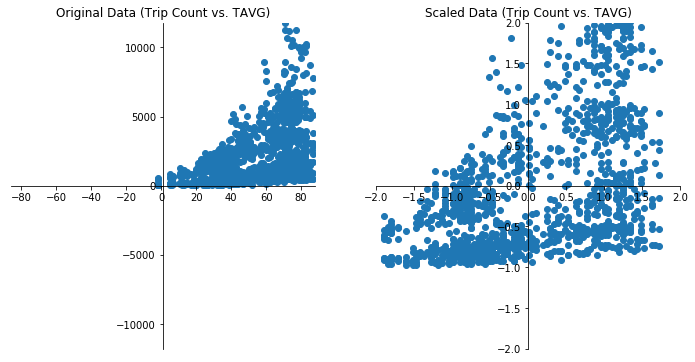

In [23]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data (Trip Count vs. TAVG)")
axes2.set_title("Scaled Data (Trip Count vs. TAVG)")

maxx = X_train_ch["TAVG"].max()
maxy = y_train_ch.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train_ch["TAVG"], y_train_ch)
axes2.scatter(X_train_scaled_ch[:,0], y_train_scaled_ch[:])

plt.savefig("scaled_chicago_hr.png", bbox_inches="tight")